In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score


df = pd.read_csv("insclass_train.csv")

features = df.drop('target', axis=1)
target_variable = df['target']
RANDOM_STATE = 42

features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151406 entries, 0 to 151405
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   variable_1   151406 non-null  object 
 1   variable_2   151406 non-null  int64  
 2   variable_3   151406 non-null  int64  
 3   variable_4   151406 non-null  int64  
 4   variable_5   151406 non-null  object 
 5   variable_6   151295 non-null  float64
 6   variable_7   55767 non-null   float64
 7   variable_8   121507 non-null  float64
 8   variable_9   16970 non-null   float64
 9   variable_10  151406 non-null  int64  
 10  variable_11  151406 non-null  int64  
 11  variable_12  149878 non-null  float64
 12  variable_13  149749 non-null  float64
 13  variable_14  148479 non-null  float64
 14  variable_15  13 non-null      float64
 15  variable_16  151394 non-null  float64
 16  variable_17  151394 non-null  float64
 17  variable_18  151394 non-null  float64
 18  variable_19  151406 non-

In [15]:
data_types = df.dtypes
print(data_types)

variable_1      object
variable_2       int64
variable_3       int64
variable_4       int64
variable_5      object
variable_6     float64
variable_7     float64
variable_8     float64
variable_9     float64
variable_10      int64
variable_11      int64
variable_12    float64
variable_13    float64
variable_14    float64
variable_15    float64
variable_16    float64
variable_17    float64
variable_18    float64
variable_19    float64
variable_20     object
variable_21     object
variable_22     object
variable_23      int64
variable_24    float64
variable_25      int64
variable_26      int64
variable_27    float64
variable_28     object
target           int64
dtype: object


In [16]:
numeric_columns = features.select_dtypes(include='number').columns
numeric_columns

Index(['variable_2', 'variable_3', 'variable_4', 'variable_6', 'variable_7',
       'variable_8', 'variable_9', 'variable_10', 'variable_11', 'variable_12',
       'variable_13', 'variable_14', 'variable_15', 'variable_16',
       'variable_17', 'variable_18', 'variable_19', 'variable_23',
       'variable_24', 'variable_25', 'variable_26', 'variable_27'],
      dtype='object')

In [17]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer.fit(features[numeric_columns])
features[numeric_columns] = imputer.transform(features[numeric_columns])

In [18]:
#scaler = MinMaxScaler() f1_score =0.18
scaler = StandardScaler() #f1_score = 0.24
features[numeric_columns] = scaler.fit_transform(features[numeric_columns])
features["variable_0"] = np.ones((features.shape[0]))

In [19]:
features = features.drop(['variable_7', 'variable_9', 'variable_15'], axis=1)

categorical_columns = ['variable_1', 'variable_5', 'variable_20', 'variable_21', 'variable_22', 'variable_28']

encoder = ce.TargetEncoder()

features[categorical_columns] = encoder.fit_transform(features[categorical_columns], target_variable)



C:\Users\naclz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
C:\Users\naclz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
C:\Users\naclz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

In [20]:
features.shape
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151406 entries, 0 to 151405
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   variable_1   151406 non-null  float64
 1   variable_2   151406 non-null  float64
 2   variable_3   151406 non-null  float64
 3   variable_4   151406 non-null  float64
 4   variable_5   151406 non-null  float64
 5   variable_6   151406 non-null  float64
 6   variable_8   151406 non-null  float64
 7   variable_10  151406 non-null  float64
 8   variable_11  151406 non-null  float64
 9   variable_12  151406 non-null  float64
 10  variable_13  151406 non-null  float64
 11  variable_14  151406 non-null  float64
 12  variable_16  151406 non-null  float64
 13  variable_17  151406 non-null  float64
 14  variable_18  151406 non-null  float64
 15  variable_19  151406 non-null  float64
 16  variable_20  151406 non-null  float64
 17  variable_21  151406 non-null  float64
 18  variable_22  151406 non-

In [21]:
test_size = 22624/151406
test_size

0.14942604652391583

In [22]:
features_train, features_test, target_train, target_test = train_test_split(features, target_variable, test_size=0.15, stratify=target_variable, random_state=RANDOM_STATE) 

target_train = np.array(target_train).reshape(-1, 1)
target_test = np.array(target_test).reshape(-1, 1)
target_test.shape

(22711, 1)

In [23]:
target_counts = df["target"].value_counts()
print(target_counts)


target
0    136947
1     14459
Name: count, dtype: int64


In [24]:
class LogisticRegressionGD:
    def __init__(self, threshold=0.5): 
        self.a = np.zeros(2).reshape(1, 2)
        self._estimator_type = "classifier" 
        self.threshold = threshold 
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x @ self.a))    
    def predict_proba(self, x): 
        return self.sigmoid(x)
    def predict(self, x): 
        return (self.predict_proba(x) > self.threshold).astype(int)
    def coefs(self):
        return self.a      
    def LogLikelihood(self, x, Y):
        return (Y * np.log(self.predict_proba(x) + 1e-7) + (1 - Y) * np.log(1 + 1e-7 - self.predict_proba(x))).sum()
    def CrossEntropy(self, x, Y):
        return (-Y * np.log(self.predict_proba(x)) - (1 - Y) * np.log(1 - self.predict_proba(x))).sum()    
    def accuracy(self, x, Y):
        return (self.predict(x) == Y).mean() 
    def fit(self, x, Y, alpha = 0.01, epsylon = 0.01, max_steps = 10000, Rtype = "LL"):
        self.a = np.zeros(x.shape[1]).reshape(x.shape[1],1)
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            if Rtype == "LL":
                new_error = self.LogLikelihood(x, Y)
                dT_a = x.T @(Y - self.predict_proba(x)) / x.shape[0]  
                self.a += alpha*dT_a
            elif Rtype == "CE":
                new_error = self.CrossEntropy(x, Y)
                #display(new_error)
                dT_a = -x.T @(Y - self.predict_proba(x)) / x.shape[0]
                self.a -= alpha*dT_a
            step += 1
            steps.append(step)
            errors.append(new_error)
            #if new_error < epsylon:
            #    break
        return steps, errors

In [25]:
model = LogisticRegressionGD()
steps_LL, errors_LL = model.fit(
    features_train, 
    target_train, 
    alpha=0.01,
    epsylon=0.01,
    max_steps=1000,
    Rtype="LL"
)
print(f"Accuracy on test (LL_test): {model.accuracy(features_test, target_test)[0]}")
print(f"Accuracy on test (LL_train): {model.accuracy(features_train, target_train)[0]}")
steps_CE, errors_CE = model.fit(
    features_train, 
    target_train, 
    alpha=0.01,
    epsylon=0.01,
    max_steps=1000,
    Rtype="CE"
)
print(f"Accuracy on test (CE_test): {model.accuracy(features_test, target_test)[0]}")
print(f"Accuracy on test (CE_train): {model.accuracy(features_train, target_train)[0]}")

Accuracy on test (LL_test): 0.9094711813658579
Accuracy on test (LL_train): 0.9090019037258634
Accuracy on test (CE_test): 0.9094711813658579
Accuracy on test (CE_train): 0.9090019037258634


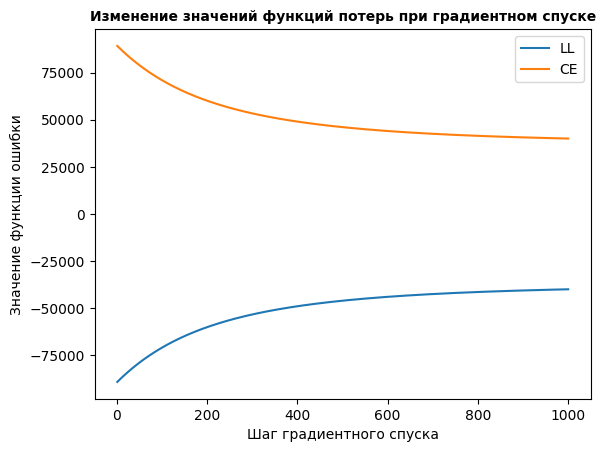

In [26]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Изменение значений функций потерь при градиентном спуске', fontsize=10, fontweight='bold')

ax.set_xlabel('Шаг градиентного спуска')
ax.set_ylabel('Значение функции ошибки')
_ = ax.plot(steps_LL, errors_LL, label='LL')
_ = ax.plot(steps_CE, errors_CE, label='CE')

handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)

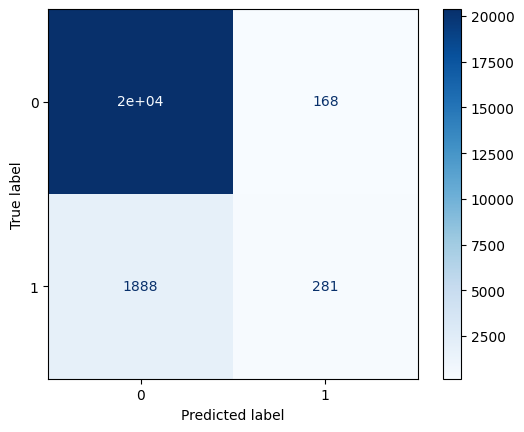

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(target_test, model.predict(features_test), labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
_ = disp.plot(cmap=plt.cm.Blues)


In [28]:
f1 = f1_score(target_train, model.predict(features_train))
print(f"F1 Score train: {f1}")
f1 = f1_score(target_test, model.predict(features_test))
print(f"F1 Score test: {f1}")

F1 Score train: 0.20759185330536573
F1 Score test: 0.21466768525592056


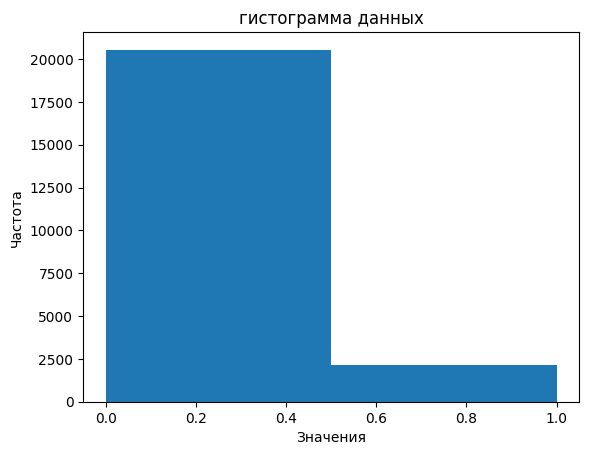

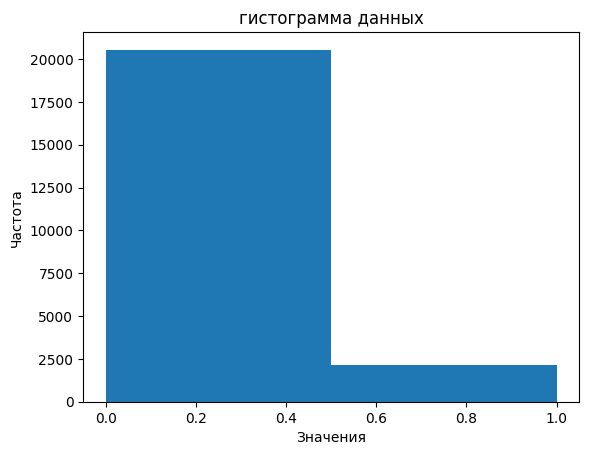

In [29]:
plt.hist(target_test, bins=2)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('гистограмма данных')
plt.show()

plt.hist(target_test, bins=2)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('гистограмма данных')
plt.show()

In [30]:
from sklearn.utils import resample

minority_oversample = resample(
    features_train[target_train == 1],
    replace=True,
    n_samples=len(target_train[target_train == 0]),
    random_state=RANDOM_STATE
)
minority_oversample = minority_oversample.reset_index(drop=True)
features_train_oversampled = pd.concat([features_train[target_train == 0], minority_oversample]).reset_index(drop=True)
target_train_oversampled = np.array([np.zeros(len(target_train[target_train == 0])), np.ones(len(minority_oversample))]).reshape(-1, 1)


In [31]:
minority_oversample_test = resample(
    features_test[target_test == 1],
    replace=True,
    n_samples=len(target_test[target_test == 0]),
    random_state=RANDOM_STATE
)
minority_oversample_test = minority_oversample_test.reset_index(drop=True)
features_test_oversampled = pd.concat([features_test[target_test == 0], minority_oversample_test]).reset_index(drop=True)
target_test_oversampled = np.array([np.zeros(len(target_test[target_test == 0])), np.ones(len(minority_oversample_test))]).reshape(-1, 1)


In [32]:
model = LogisticRegressionGD()

steps_LL, errors_LL = model.fit(
    features_train_oversampled,
    target_train_oversampled,
    alpha=0.01,
    epsylon=0.01,
    max_steps=1000,
    Rtype="LL"
)


steps_CE, errors_CE = model.fit(
    features_train_oversampled,
    target_train_oversampled,
    alpha=0.01,
    epsylon=0.01,
    max_steps=1000,
    Rtype="CE"
)
print(f"Accuracy on train (LL_train_oversampled): {model.accuracy(features_train_oversampled, target_train_oversampled)[0]}")
print(f"Accuracy on test (LL_test_oversampled): {model.accuracy(features_test_oversampled, target_test_oversampled)[0]}")
print(f"Accuracy on train (CE_train_oversampled): {model.accuracy(features_train_oversampled, target_train_oversampled)[0]}")
print(f"Accuracy on test (CE_test_oversampled): {model.accuracy(features_test_oversampled, target_test_oversampled)[0]}")


Accuracy on train (LL_train_oversampled): 0.613753704737769
Accuracy on test (LL_test_oversampled): 0.6121604517573751
Accuracy on train (CE_train_oversampled): 0.613753704737769
Accuracy on test (CE_test_oversampled): 0.6121604517573751


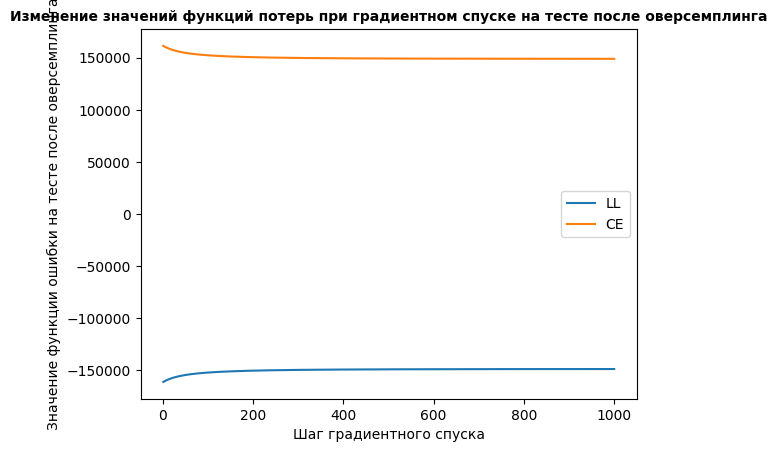

In [33]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Изменение значений функций потерь при градиентном спуске на тесте после оверсемплинга', fontsize=10, fontweight='bold')

ax.set_xlabel('Шаг градиентного спуска')
ax.set_ylabel('Значение функции ошибки на тесте после оверсемплинга')
_ = ax.plot(steps_LL, errors_LL, label='LL')
_ = ax.plot(steps_CE, errors_CE, label='CE')

handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)

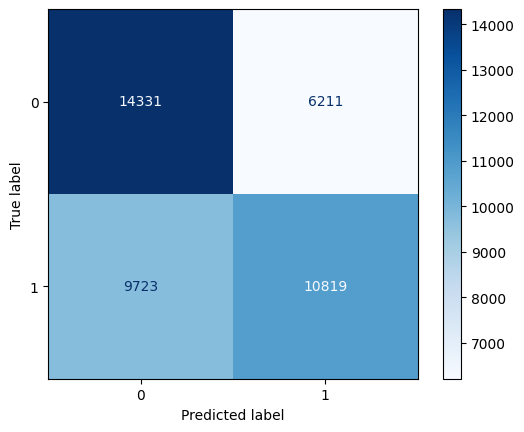

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test_oversampled = confusion_matrix(target_test_oversampled, model.predict(features_test_oversampled), labels=[0, 1])
disp_test_oversampled = ConfusionMatrixDisplay(confusion_matrix=cm_test_oversampled, display_labels=[0, 1])
_ = disp_test_oversampled.plot(cmap=plt.cm.Blues)

In [35]:
f1 = f1_score(target_train_oversampled, model.predict(features_train_oversampled))
print(f"F1 Score train: {f1}")
f1 = f1_score(target_test_oversampled, model.predict(features_test_oversampled))
print(f"F1 Score test: {f1}")

F1 Score train: 0.5763511985526911
F1 Score test: 0.5759075907590758


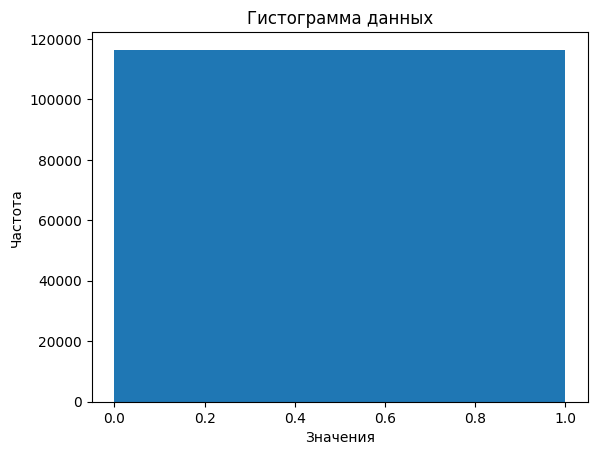

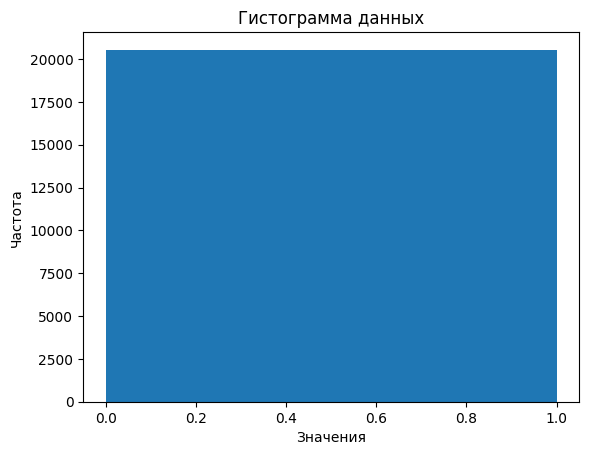

In [36]:
plt.hist(target_train_oversampled, bins=2)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма данных')
plt.show()

plt.hist(target_test_oversampled, bins=2)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма данных')
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression


models = {
    'L1': LogisticRegression(penalty='l1', solver='liblinear',C=0.1),
    'L2': LogisticRegression(penalty='l2',C=0.1),
    'ElasticNet': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5,C=0.1)
}


results = {}
for name, model in models.items():
    model.fit(features_train_oversampled, target_train_oversampled)
    f1_train = f1_score(target_train_oversampled, model.predict(features_train_oversampled))
    accuracy_train = model.score(features_train_oversampled, target_train_oversampled)
    f1_test = f1_score(target_test_oversampled, model.predict(features_test_oversampled))
    accuracy_test = model.score(features_test_oversampled, target_test_oversampled)
    results[f'f1_{name}_train'] = f1_train
    results[f'Accuracy_{name}_train'] = accuracy_train
    results[f'f1_{name}_test'] = f1_test
    results[f'Accuracy_{name}_test'] = accuracy_test


for key, value in results.items():
    print(f"{key}: {value}")





C:\Users\naclz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\naclz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\naclz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIM

f1_L1_train: 0.5982218244063134
Accuracy_L1_train: 0.6259567887977321
f1_L1_test: 0.6015722615576844
Accuracy_L1_test: 0.6274462077694479
f1_L2_train: 0.5951377693947996
Accuracy_L2_train: 0.6256732958206263
f1_L2_test: 0.5959611854183058
Accuracy_L2_test: 0.6250121701879077
f1_ElasticNet_train: 0.5919737431001043
Accuracy_ElasticNet_train: 0.6240711309651648
f1_ElasticNet_test: 0.5962967826657912
Accuracy_ElasticNet_test: 0.6258640833414468


C:\Users\naclz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [38]:
# Accuracy and F1 Score values before regularization
accuracy_LL_train_before = 0.613753704737769
accuracy_LL_test_before = 0.6121604517573751
accuracy_CE_train_before = 0.613753704737769
accuracy_CE_test_before = 0.6121604517573751
f1_score_train_before = 0.5763511985526911
f1_score_test_before = 0.5759075907590758

# Accuracy and F1 Score values after L1 regularization
f1_L1_train = 0.5978641117233867
accuracy_L1_train = 0.6257291353464198
f1_L1_test = 0.6011979166666667
accuracy_L1_test = 0.6272514847629247

# Accuracy and F1 Score values after L2 regularization
f1_L2_train = 0.5951377693947996
accuracy_L2_train = 0.6256732958206263
f1_L2_test = 0.5959611854183058
accuracy_L2_test = 0.6250121701879077

# Accuracy and F1 Score values after ElasticNet regularization
f1_ElasticNet_train = 0.5919792628232025
accuracy_ElasticNet_train = 0.6240797216614407
f1_ElasticNet_test = 0.5962498030358737
accuracy_ElasticNet_test = 0.6257910622140006


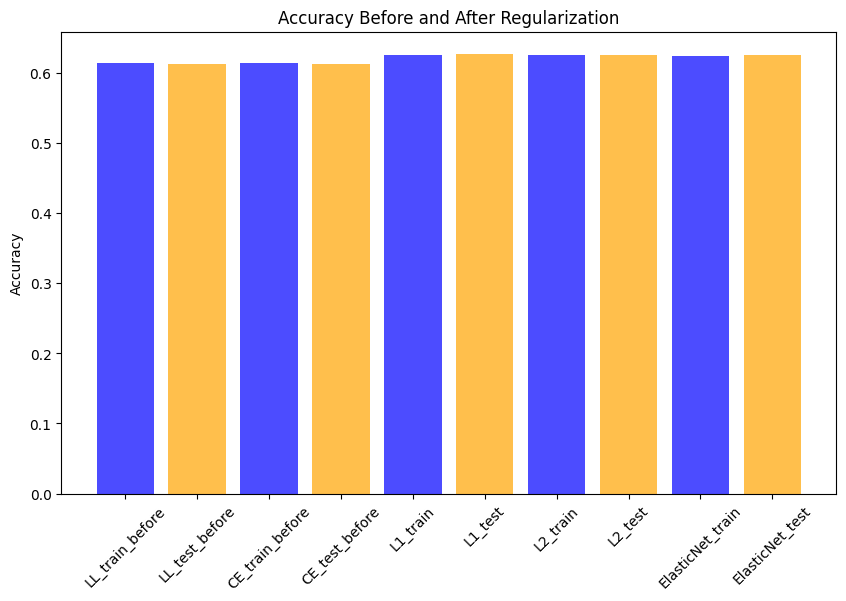

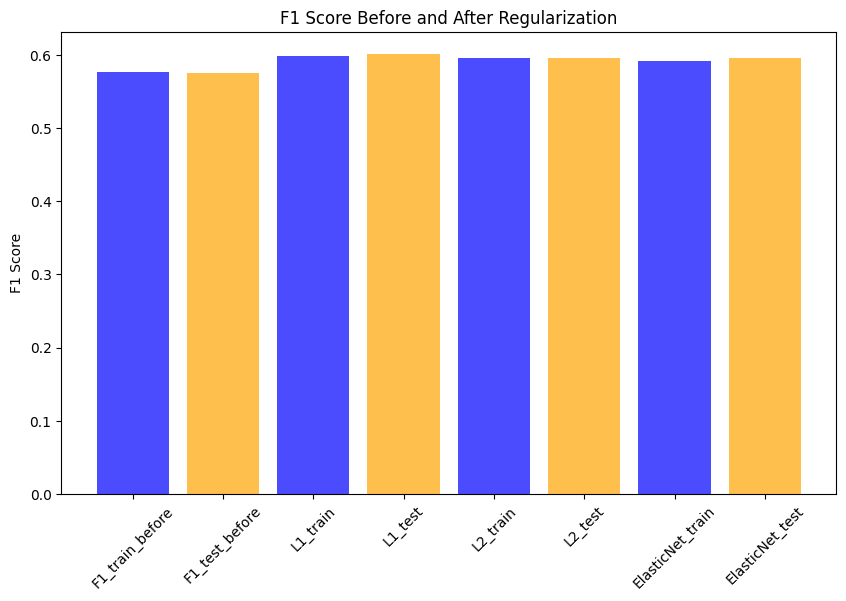

In [39]:
import matplotlib.pyplot as plt

# Lists for plotting accuracy values before and after regularization
accuracy_labels = ['LL_train_before', 'LL_test_before', 'CE_train_before', 'CE_test_before',
                   'L1_train', 'L1_test', 'L2_train', 'L2_test', 'ElasticNet_train', 'ElasticNet_test']
accuracy_values = [
    accuracy_LL_train_before, accuracy_LL_test_before, accuracy_CE_train_before, accuracy_CE_test_before,
    accuracy_L1_train, accuracy_L1_test, accuracy_L2_train, accuracy_L2_test,
    accuracy_ElasticNet_train, accuracy_ElasticNet_test
]

# Plotting accuracy before and after regularization
plt.figure(figsize=(10, 6))
plt.bar(accuracy_labels, accuracy_values, color=['blue', 'orange'] * 5, alpha=0.7)
plt.title('Accuracy Before and After Regularization')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Lists for plotting F1 score values before and after regularization
f1_labels = ['F1_train_before', 'F1_test_before',
             'L1_train', 'L1_test', 'L2_train', 'L2_test', 'ElasticNet_train', 'ElasticNet_test']
f1_values = [
    f1_score_train_before, f1_score_test_before,
    f1_L1_train, f1_L1_test, f1_L2_train, f1_L2_test,
    f1_ElasticNet_train, f1_ElasticNet_test
]

# Plotting F1 scores before and after regularization
plt.figure(figsize=(10, 6))
plt.bar(f1_labels, f1_values, color=['blue', 'orange'] * 4, alpha=0.7)
plt.title('F1 Score Before and After Regularization')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()
